In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [223]:
datasets = ["hungarian", "cleveland", "switzerland", "long-beach-va"]

In [224]:
def readRawData(filePath:str):
    with open(filePath) as file:
        dataString = file.read()
        dataString = dataString.replace("\n"," ")
        dataString = dataString.replace("name ","name\n")
        dataString = dataString.replace(" ",",")
        return dataString

In [225]:
from io import StringIO
df = pd.DataFrame()
for dataset in datasets:
    dataset_df = pd.read_csv(StringIO(readRawData("./Data/"+ dataset +".data")), header=None, sep=",")
    dataset_df['dataset'] = dataset
    df = pd.concat([df,dataset_df ], ignore_index=True)

In [226]:
df.columns=["id", "ccf", "age", "sex", "painloc", "painexer" , "relrest" , "pncaden" , "cp", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name", "dataset"]

In [227]:
df = df.replace(-9, float('nan'))

In [228]:
df.describe()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
count,899.000000,899.0,899.000000,899.000000,617.000000,617.000000,613.000000,0.0,899.000000,840.000000,...,327.000000,654.000000,629.000000,880.000000,880.000000,880.000000,880.000000,883.000000,311.000000,119.000000
mean,957.235818,0.0,53.480534,0.790879,0.920583,0.593193,0.672104,NaN,3.253615,132.101190,...,1.067278,1.342508,1.171701,1.020455,1.032955,1.132955,1.611364,1.178935,27.623119,5.869748
std,1204.015482,0.0,9.435894,0.406908,0.270607,0.491637,0.469830,NaN,0.928499,19.151127,...,0.250887,0.474912,0.377421,0.277384,0.415902,0.703837,1.722199,0.512572,31.675295,1.650914
min,1.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.220000,3.300000
25%,116.000000,0.0,47.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.685000,4.800000
50%,266.000000,0.0,54.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,130.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820000,5.600000
75%,1207.500000,0.0,60.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,140.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,6.900000
max,5002.000000,0.0,77.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,200.000000,...,2.000000,2.000000,2.000000,7.000000,10.000000,8.000000,8.000000,5.000000,86.000000,11.300000


In [229]:
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name,dataset
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungarian
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungarian
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungarian
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungarian
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungarian


# Explore how many NaNs are within one coloumn for each attribute.

In [230]:
(df.loc[ : , df.columns != 'dataset'].isna()).join(df['dataset']).groupby("dataset").sum()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
dataset,,,,,,,,,,,,,,,,,,,,,
cleveland,0,0,0,0,282,282,282,282,0,0,...,0,0,0,0,0,0,0,282,282,0
hungarian,1,1,1,1,1,1,1,295,1,2,...,245,270,1,1,1,1,1,267,295,1
long-beach-va,1,1,1,1,1,1,5,201,1,57,...,2,2,3,3,3,3,4,24,82,1
switzerland,0,0,0,0,0,0,0,123,0,2,...,0,0,17,17,17,17,13,17,123,0


In [231]:
df.drop(["painloc", "painexer", "relrest", "pncaden", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs",  "dm", "famhist", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk","thal" ], inplace=True, axis=1)

In [232]:
df.isna().sum()

id           2
ccf          2
age          2
sex          2
cp           2
restecg      4
thalach     57
thalrest    58
tpeakbps    65
tpeakbpd    65
dummy       61
trestbpd    61
exang       57
xhypo       60
oldpeak     64
cmo         13
cday        11
cyr         11
num          2
name         2
dataset      0
dtype: int64

In [233]:
df.dropna(inplace=True, axis=0, how='any')

In [234]:
(df.loc[ : , df.columns != 'dataset'].isna()).join(df['dataset']).groupby("dataset").sum()

,id,ccf,age,sex,cp,restecg,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,cmo,cday,cyr,num,name
dataset,,,,,,,,,,,,,,,,,,,,
cleveland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hungarian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long-beach-va,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [235]:
df.shape

(815, 21)

In [236]:
df.describe()

,id,ccf,age,sex,cp,restecg,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,cmo,cday,cyr,num
count,815.000000,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,972.478528,0.0,53.034356,0.774233,3.251534,0.592638,137.781595,75.493252,171.997546,87.336196,132.213497,83.633129,0.390184,0.024540,0.860859,6.169325,15.974233,83.933742,1.099387
std,1189.244863,0.0,9.386267,0.418343,0.928286,0.818067,25.835216,14.549150,25.555980,14.800968,18.973888,10.296305,0.488091,0.154813,1.084524,3.470591,8.918306,3.348773,1.257386
min,1.000000,0.0,28.000000,0.000000,1.000000,0.000000,60.000000,37.000000,84.000000,11.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,1.000000,1.000000,1.000000,0.000000
25%,126.500000,0.0,46.000000,1.000000,3.000000,0.000000,120.000000,65.000000,156.000000,80.000000,120.000000,80.000000,0.000000,0.000000,0.000000,3.000000,8.000000,83.000000,0.000000
50%,288.000000,0.0,54.000000,1.000000,4.000000,0.000000,140.000000,74.000000,170.000000,88.000000,130.000000,80.000000,0.000000,0.000000,0.500000,6.000000,16.000000,84.000000,1.000000
75%,1211.500000,0.0,60.000000,1.000000,4.000000,1.000000,157.500000,84.000000,190.000000,100.000000,140.000000,90.000000,1.000000,0.000000,1.500000,9.000000,24.000000,85.000000,2.000000
max,5002.000000,0.0,77.000000,1.000000,4.000000,2.000000,202.000000,134.000000,240.000000,134.000000,200.000000,120.000000,1.000000,1.000000,6.200000,12.000000,31.000000,87.000000,4.000000


In [237]:
df.drop(['id', 'name'], inplace=True, axis=1)

In [238]:
df

,ccf,age,sex,cp,restecg,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,cmo,cday,cyr,num,dataset
0,0.0,40.0,1.0,2.0,0.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,12.0,20.0,84.0,0.0,hungarian
1,0.0,49.0,0.0,3.0,0.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,11.0,20.0,84.0,1.0,hungarian
2,0.0,37.0,1.0,2.0,1.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,11.0,26.0,84.0,0.0,hungarian
3,0.0,48.0,0.0,4.0,0.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,9.0,30.0,84.0,3.0,hungarian
4,0.0,54.0,1.0,3.0,0.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,7.0,30.0,84.0,0.0,hungarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.0,62.0,1.0,4.0,1.0,138.0,86.0,202.0,98.0,158.0,90.0,1.0,0.0,0.0,1.0,26.0,87.0,1.0,long-beach-va
894,0.0,46.0,1.0,4.0,0.0,126.0,88.0,174.0,114.0,134.0,90.0,0.0,0.0,0.0,7.0,28.0,83.0,2.0,long-beach-va
895,0.0,54.0,0.0,4.0,1.0,154.0,83.0,158.0,84.0,127.0,78.0,0.0,0.0,0.0,6.0,29.0,83.0,1.0,long-beach-va
897,0.0,55.0,1.0,4.0,1.0,100.0,74.0,210.0,100.0,122.0,70.0,0.0,0.0,0.0,4.0,17.0,86.0,2.0,long-beach-va


In [239]:
# from pandas_profiling import ProfileReport
# ProfileReport(df, title='Pandas Profiling Report')

In [240]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df[df['num'] >= 1] = 1
df['num'] = labelEncoder.fit_transform(df['num'])

<AxesSubplot:>

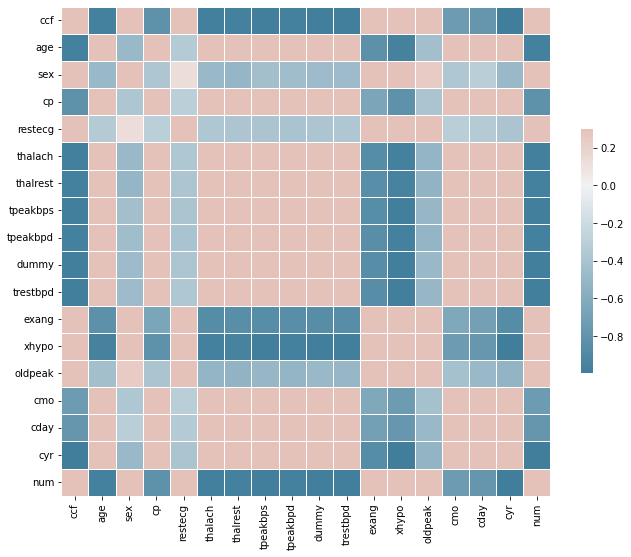

In [243]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [218]:
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset')]

y = df['num']

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from  sklearn.naive_bayes import *
estimators_and_hyperparameters=[
    (CatBoostClassifier(random_state=42, thread_count=-1, silent= True),{}),
    (XGBClassifier(random_state=42, n_jobs=-1),{}),
    (SVC(kernel='linear',random_state=42),{}),
    (SVC(kernel='poly',random_state=42),{}),
    (SVC(kernel='rbf',random_state=42),{}),
    (SVC(kernel='sigmoid',random_state=42),{}),
    #(SVC(kernel='precomputed',random_state=42),{}),
    # (BernoulliNB(),{}),
    #(CategoricalNB(),{}),
    # (ComplementNB(),{}),
    # (GaussianNB(),{}),
    # (MultinomialNB(),{}),
    (DecisionTreeClassifier(random_state=42),{}),
    (KNeighborsClassifier(n_jobs=-1),{}),
    (RandomForestClassifier(random_state=42, n_jobs=-1), {}),
    (SGDClassifier(),{})
]

In [220]:
from sklearn.preprocessing import *
scalers = [
    MaxAbsScaler(),
    MinMaxScaler(),
    Normalizer(),
    PowerTransformer(),
    QuantileTransformer(output_distribution='uniform'),
    QuantileTransformer(output_distribution='normal'),
    RobustScaler(),
    StandardScaler(),
]

In [221]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
for scaler in scalers:
    print(f'Current Sclaer: {scaler.__class__.__name__}')
    for estimator in estimators_and_hyperparameters:
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        try:
            X_trans = scaler.fit_transform(X)
            scores = cross_val_score(estimator[0], X_trans, y, scoring='f1',cv=skf, n_jobs=-1)
            print(f'F1 score for {estimator[0].__class__.__name__}: {mean(scores)}')
        except Exception as e:
            print(e)
            print(f'Skipping the combination of {scaler.__class__.__name__} and {estimator.__class__.__name__}')
    print('-----------------------------------------------------------------')

Current Sclaer: MaxAbsScaler
F1 score for CatBoostClassifier: 1.0
F1 score for XGBClassifier: 1.0
F1 score for SVC: 1.0
F1 score for SVC: 1.0
F1 score for SVC: 1.0
F1 score for SVC: 1.0
F1 score for DecisionTreeClassifier: 1.0
F1 score for KNeighborsClassifier: 1.0
F1 score for RandomForestClassifier: 1.0
F1 score for SGDClassifier: 1.0
-----------------------------------------------------------------
Current Sclaer: MinMaxScaler


KeyboardInterrupt: 